# ClaSP Visualization
In this notebook, we visualize the profiles from ClaSP and FLOSS.

In [1]:
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
import numpy as np
import pandas as pd
import daproli as dp

import pandas as pd
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt

import seaborn as sns

sns.set_theme()
sns.set_color_codes()

import ast
import Orange
import sys
sys.path.append("../")

from tqdm import tqdm

In [3]:
from src.utils import load_mosad_dataset
from src.visualizer import plot_profile_with_ts, plot_ts

In [4]:
df_mosad = load_mosad_dataset()
df_mosad

,dataset,routine,subject,sensor,sample_rate,change_points,time_series
0,Routine1_Subject1_X-Acc,1,1,X-Acc,50,"[738, 1722, 11356, 14124, 20558, 29858, 32736,...","[-0.1986, -0.454326, -0.5473, -0.496056, -0.48..."
1,Routine1_Subject1_X-Gyro,1,1,X-Gyro,50,"[738, 1722, 11356, 14124, 20558, 29858, 32736,...","[0.0174, 0.0358, 0.0431, 0.0358, 0.0168, 0.008..."
2,Routine1_Subject1_X-Mag,1,1,X-Mag,50,"[738, 1722, 11356, 14124, 20558, 29858, 32736,...","[-31.02, -30.84, -30.65, -30.58, -31.52, -30.7..."
3,Routine1_Subject1_Y-Acc,1,1,Y-Acc,50,"[738, 1722, 11356, 14124, 20558, 29858, 32736,...","[-0.0161, -0.100877, -0.1434, -0.13972, -0.081..."
4,Routine1_Subject1_Y-Gyro,1,1,Y-Gyro,50,"[738, 1722, 11356, 14124, 20558, 29858, 32736,...","[-0.0525, -0.0568, -0.0482, -0.0012, 0.0153, 0..."
5,Routine1_Subject1_Y-Mag,1,1,Y-Mag,50,"[738, 1722, 11356, 14124, 20558, 29858, 32736,...","[-127.26, -127.41, -127.86, -127.23, -127.27, ..."
6,Routine1_Subject1_Z-Acc,1,1,Z-Acc,50,"[738, 1722, 11356, 14124, 20558, 29858, 32736,...","[0.0865, 0.106412, 0.0107, -0.143706, -0.2007,..."
7,Routine1_Subject1_Z-Gyro,1,1,Z-Gyro,50,"[738, 1722, 11356, 14124, 20558, 29858, 32736,...","[0.0509, 0.0851, 0.1157, 0.1291, 0.1193, 0.114..."
8,Routine1_Subject1_Z-Mag,1,1,Z-Mag,50,"[738, 1722, 11356, 14124, 20558, 29858, 32736,...","[-78.8, -78.16, -78.93, -79.72, -79.14, -78.78..."
9,Routine1_Subject2_X-Acc,1,2,X-Acc,50,"[928, 1652, 10952, 14086, 20136, 29236, 32502,...","[-0.0098, 0.0536, 0.1473, 0.1691, -0.0239, -0...."


Let's load some classification score profiles.

In [19]:
competitor = "FLOSS"
converters = dict([(column, eval) for column in ["true_cps", "found_cps", "profile"]])
df_score = pd.read_csv(f"../experiments/competitor/{competitor}.csv.gz", converters=converters, compression="gzip")
df_score

,dataset,true_cps,found_cps,f1_score,covering_score,profile
0,Routine1_Subject1_X-Acc,"[738, 1722, 11356, 14124, 20558, 29858, 32736,...","[1343, 648, 1621, 1928, 1092, 2231, 2481, 2731...",0.308,0.246,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
1,Routine1_Subject1_X-Gyro,"[738, 1722, 11356, 14124, 20558, 29858, 32736,...","[1363, 50156, 1677, 49905, 49613, 14073, 14553...",0.308,0.353,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
2,Routine1_Subject1_X-Mag,"[738, 1722, 11356, 14124, 20558, 29858, 32736,...","[326, 643, 29679, 30131, 29428, 30441, 30703, ...",0.231,0.244,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
3,Routine1_Subject1_Y-Acc,"[738, 1722, 11356, 14124, 20558, 29858, 32736,...","[59337, 1341, 50149, 49873, 49590, 49339, 4908...",0.308,0.341,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
4,Routine1_Subject1_Y-Gyro,"[738, 1722, 11356, 14124, 20558, 29858, 32736,...","[665, 1365, 923, 395, 1695, 50137, 14066, 4988...",0.385,0.353,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
5,Routine1_Subject1_Y-Mag,"[738, 1722, 11356, 14124, 20558, 29858, 32736,...","[302, 645, 33373, 33023, 31805, 32064, 32772, ...",0.231,0.247,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
6,Routine1_Subject1_Z-Acc,"[738, 1722, 11356, 14124, 20558, 29858, 32736,...","[1319, 1643, 1927, 1024, 773, 2230, 2523, 1407...",0.308,0.251,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
7,Routine1_Subject1_Z-Gyro,"[738, 1722, 11356, 14124, 20558, 29858, 32736,...","[1361, 668, 1639, 14076, 14326, 14615, 1911, 2...",0.308,0.256,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
8,Routine1_Subject1_Z-Mag,"[738, 1722, 11356, 14124, 20558, 29858, 32736,...","[599, 32126, 32686, 31867, 32988, 33239, 33495...",0.308,0.290,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
9,Routine1_Subject2_X-Acc,"[928, 1652, 10952, 14086, 20136, 29236, 32502,...","[267, 733, 1542, 1820, 2117, 50928, 51178, 506...",0.385,0.315,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."


<Figure size 432x288 with 0 Axes>

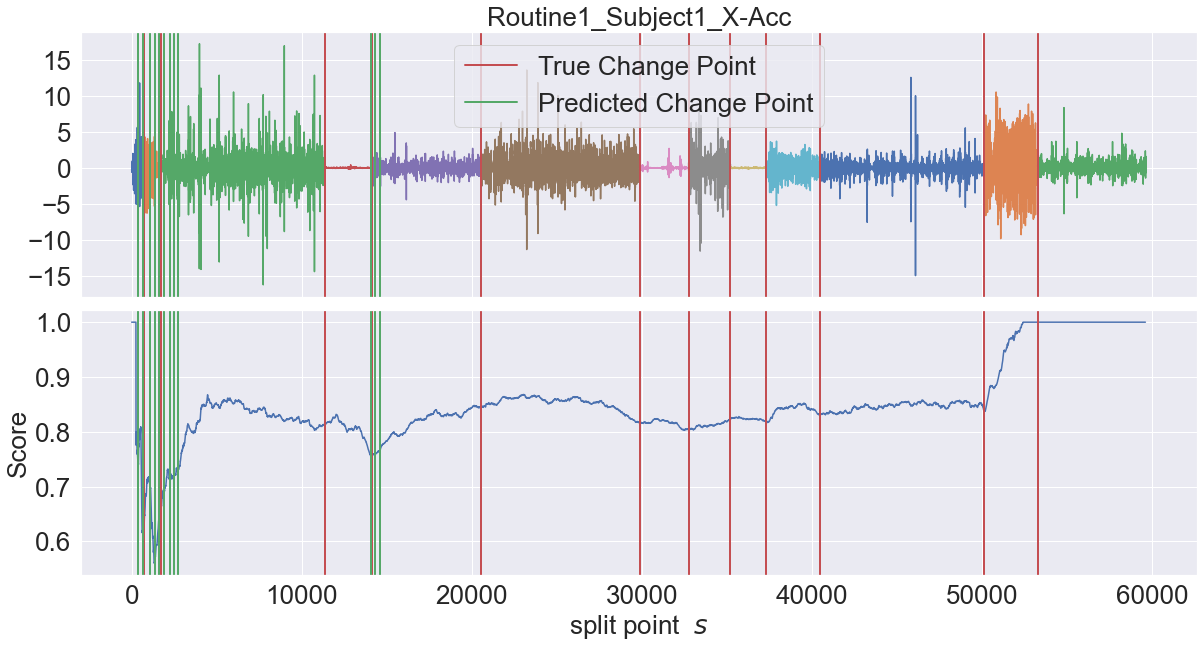

In [27]:
selection = 0

row = df_score.iloc[selection,:]
plot_profile_with_ts(row.dataset, df_mosad.iloc[selection,:].time_series, np.array(row.profile), np.array(row.true_cps), np.array(row.found_cps), score="Score", show=False, save_path=None)